<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression 2**
*출처: 서울대학교 데이터사이언스대학원 머신러닝 딥러닝 이준석 교수님 수업 정리*

- Categorical variable로의 확장
- Interaction과 nonlinearity에 대한 고려
- 변수 선택 (Feature selection)

## **1. 범주형 변수를 활용한 Linear Regression**

**1) binary 변수일 경우**

만약 house를 own하냐/안하냐에 대한 변수를 모델에 넣고 싶다면, 다음과 같이 갖고 있다면 1, 갖지 않고 있다면 0으로 부여하면 됨.

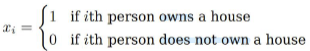

이 경우, linear regression에 적용하면 다음과 같은 결과값을 추정할 수 있

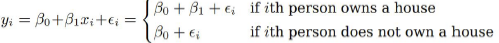


**2) 3개 이상의 class를 가진 범주형 변수 dummy 변수 활용할 경우**

class k에 대해 *k-1*개의 변수를 부여할 수 있음.

예를 들어, region에 대해 East,West,South에 대해 3개의 class에 대해 변수화하고 싶다면, South에 속하는 유무, West에 속하는 유무로 2개의 더미 변수를 만들고, 여기서 East에 경우네는 south, west 둘다에 속하지 않은 기본 beta0에 해당할 것을 유추할 수 있음.

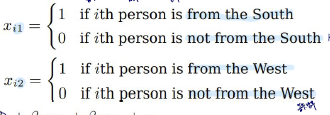


여기서 추정된 모델은 다음과 같음.

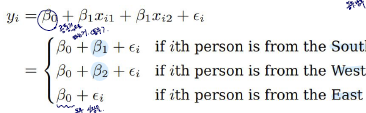


**3) one hot Encoding 방법 활용할 경우**

해당 변수가 꼭 하나의 class를 가져야된다는 법은 없기에, 각 class에 대해 binary variable을 부여할 수도 있음.

예를 들어, color 변수에 대하여 red, blue, green 3개의 class를 활용하고 싶다면, 각 변수를 각각 x1, x2, x3로 부여하고, 갖고 있다면 1, 없다면 0으로 변수화할 수 있음.

## **2. 모델에 Interaction과 Nonlinearity 고려하기**

**1) Interaction이란?**

변수 A와 변수 B가 서로에게 영향을 주면서, 전체 Y가 증가&감소하는데 시너지 효과를 내는 것.

따라서, Synergy 효과가 존재하는 경우에, 이를 고려하지 않고 모델링을 한다면, 실제 true값보다 underestimate하는 경향 존재.



- Linear regression에서 모델링하는 방법

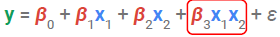

ex) *Sales*변수에 대해 *TV, radio, TV와 radio의 interaction*을 고려하는 경우

> 선형회귀에 대한 식 결과값이 다음과 나왔고, interaction이 없을 때 r-squared가 89.7%, 추가했을 때의 값이 96.8%인 경우.

> 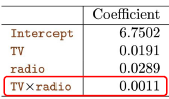

> interaction을 추가함으로서 (96.8-89.7)/(100-89.7)=69 즉, **sales변수의 variability가 69%정도 더 설명된다**

> **TV 광고에 대한 $1000 투자**로 인해, 19.1+1.1x(radio)정도 Sales가 증가한다.

> **radio 광고에 대한 $1000 투자**로 인해, 28.9+1.1x(TV)정도 Sales가 증가한다.



<br/>

- **주의! interaction term 넣을 때, *main effect*는 유의하지 않더라도 꼭 넣어야 함**

<br/>

**2) Nonlinarity 고려하는 방법**

두가지 변수를 interaction으로 곱하는 것처럼, 같은 변수들끼리 곱해서 n차항을 만들 수 있고, 이를 통해 비선형적으로 고려할 수 있음.

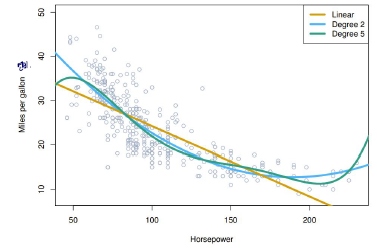


예를 들어, 다음과 같이 모델 피팅 가능함.

image.png


## **3. Feature Selection 변수 선택 방법 3가지**

+ **Best Subset Selction**
> **가능한 모든 모델을 돌리는 방법으로**, *가장 오래 걸리지만 가장 좋은 성능을 발견할 수 있음*

>> 1) M0을 아무 변수도 포함되어 있지 않은 (상수 하나만) **NULL MODEL**로 정의

>> 2) k=1.2,...,p에 대해서, k번째 순서에서 p개의 변수들 중 k개의 변수를 이용한 모든 조합 중, 가장 성능이 좋은 변수 조합 선택

>> 3) M0,...,MP중에서 가장 best model을 선택

>> - 그림으로 보면 다음과 같음.

>> 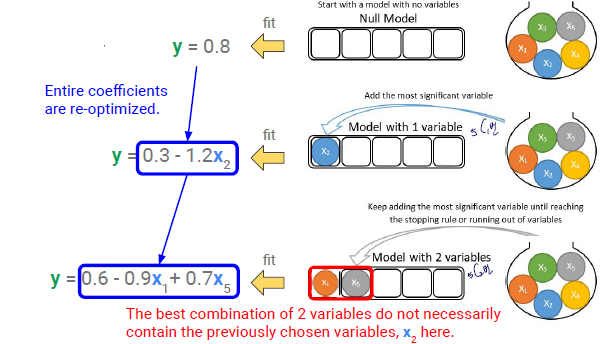


>> 이 방법의 문제점

>> - (2의 p제곱)개의 계산이 필요하므로, 너무 많은 계산량 필요로 함

>> - *curse of dimensionality* 변수가 많아지면 같은 수준의 성능을 위한 그만큼 훨씬 많은 데이터가 필요할 수 있고, overfitting과 higher variance 등의 문제가 있음

>> 앞단계와 뒤단계의 연결성이 있는 **stepwise method**를 활용하여 이를 보완할 수 있음


+ **(Forward) Stepwise Selection**

> **단계마다 하나씩 변수를 추가하는 방법으로,** 앞단계와 연결되어 진행하는 방법

>> 1) M0을 아무 변수도 포함되어 있지 않은 NULL MODEL로 정의

>> 2) k=0.1,...,p-1에 대하여,각 단계마다 k번째 모델에서 p-k개의 가능한 모델 중 가장 성능이 좋은 모델을 선택

>> 3) M0,...,MP중에서 best model 선택

>>- 그림으로 보면 다음과 같음.

>> 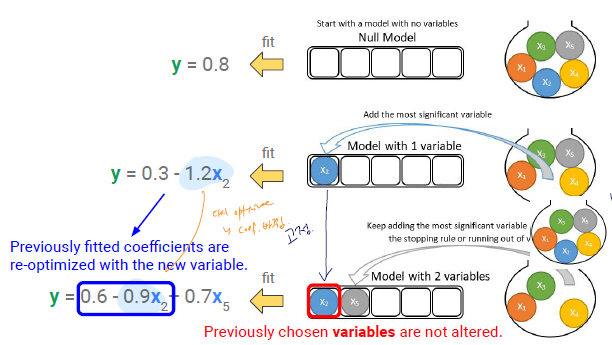


>> 이 방법의 특징
>> - 계산적으로 효율적
>> - 비교적 best possible model을 찾아낸다는 보장이 없음/

- **(Backward) Stepwise Selction**

> **모든 변수가 있는 모델에서 시작**하여 하나씩 덜 중요한 변수들을 **제거**해나가는 방법

>> 1) MP를 모든 변수가 있는 FULL MODEL로 정의

>> 2) k= p,p-1,...,1에 대하여 각 단계에서 k번째 단계에 대해 k-1개의 변수들이 포함된 k개의 모델 중 가장 성능이 좋은 모델을 선택

>> 3) M0,...,MP 중에서 best model을 선택

>> 이 방법의 특징

>> - 계산적으로 효율적 1+p(p+1)/2개의 계산만을 필요로 함

>> - best model을 찾는다는 보장이 없음

>> - n>p라는 조건 필요 (빅데이터에선 굳이 신경 안써도 됨)

- **(Forward) Stagewise Selection**

> **아무것도 없는 모델에서 변수를 하나씩 추가하는데, *앞 단계까지 있던 변수를 제외한 새롭게 추정된 변수에만 optimize*를 하는 방식**

>> 1) M0을 아무 변수도 없는 NULL MODEL로 정의

>> 2) k=1,2,...,K에 대하여, Mk에서는 새롭게 추정된 beta만 추정함

>> image.png

>> 3) M0,...,MP 중에서 best model을 찾음.

>> - 그림으로 나타내면 다음과 같음.

>> 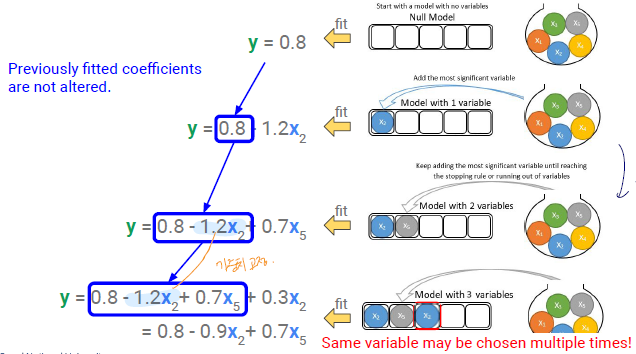

>> - 위 그림을 보면, 기존에 추정된 변수들에 대해서는 추정치가 동일한 것을 알 수 있음

>> 이 방법의 특징

>>- *greedy*한 방법 -> 전단계에서 추정이 어떻게 되든, 지금 당장 좋은 추정치를 찾겠다!


## **4. Optimal Model을 어떻게 찾을 것인가?**

데이터로 학습을 할 경우, 보통 **RSS**나 **R-sqaured**을 이용하여 성능을 평가하는데, 사실 변수가 많을수록 성능은 높아질 수 밖에 없음

-> 따라서, 우리는 해당 training data에 대한 높은 성능을 원하는 것이 아닌, 보통 적용할 수 있는 다른 데이터 (general pattern)에 대해서도 잘 작용하길 원하기 때문에, **test data**를 따로 만들어서 이에 대한 성능을 평가해야함.

따라서, 우리의 데이터는 다음과 같은 3개의 데이터셋으로 나눌 수 있음

**1) Training set** : 실제로 훈련시키는 데이터

**2) Validation set** : Training set에서 훈련시킨 결과를 실험적으로 평가하는 데이터

**3) Test set** : 실제 성능을 평가할 때 활용하는 데이터로, 평가 이전에 절대 이 데이터를 활용하면 안됨

<br/>

**- Cross Validation 실행 방법**
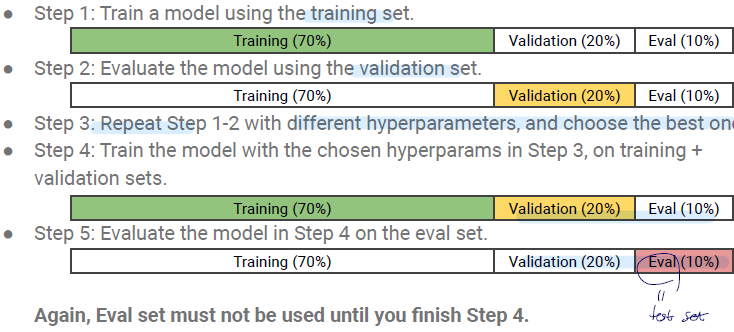

**- K-fold cross validation이란?**

> 어떤 데이터를 training set으로 활용하냐에 대한 물음에 대해 좀더 robust한 훈련을 위한 방법

> K개의 같은 사이즈로 데이터셋을 쪼개고, K번 훈련을 시키고, 훈련 데이터셋을 제외한 다른 데이터셋들로 평가를 하고, 그 K개의 score들을 평균낸 것을 활용하는 방법.


> 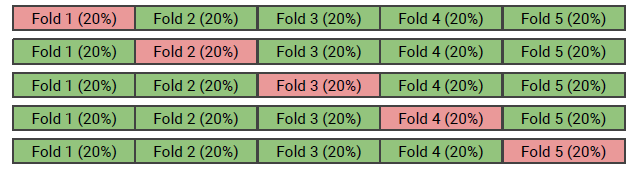